In [4]:

## Estimated County-Level Prevalence of Selected Underlying Medical Conditions Associated with Increased Risk for Severe COVID-19 Illness — United States, 2018


Underlying medical conditions important in COVID, as explored in https://www.cdc.gov/mmwr/volumes/69/wr/mm6929a1.htm?s_cid=mm6929a1_w

Older adults and those with chronic obstructive pulmonary disease, heart disease, diabetes, chronic kidney disease, and obesity are at higher risk for severe COVID-19–associated illness.
The median model-based estimate of the prevalence of any of five underlying medical conditions associated with increased risk for severe COVID-19–associated illness among U.S. adults was 47.2% among 3,142 U.S. counties. The estimated number of persons with these conditions followed population distributions, but prevalence was higher in more rural counties.

The findings can help local decision-makers identify areas at higher risk for severe COVID-19 illness in their jurisdictions and guide resource allocation and implementation of community mitigation strategies.


data source: https://stacks.cdc.gov/view/cdc/90519
There are no missing fields per county. 

        
glossary: 
COPD	Chronic obstructive pulmonary disorder
CKD	Chronic kidney disease
STAB	?state abbreviation? - uncertain
CI	Confidence interval

data:

COUNTY_NAME
STATE_NAME
STATE_FIPS
CNTY_FIPS
FIPS
county_pop2018_18 and older
anycondition_prevalence
anycondition_Lower 95% CI
anycondition_Upper 95% CI
anycondition_number
Obesity_prevalence
Obesity_Lower 95% CI
Obesity_Upper 95% CI
Obesity_number
Heart disease_prevalence
Heart disease_Lower 95% CI
Heart disease_Upper 95% CI
Heart disease_number
COPD_prevalence
COPD_Lower 95% CI
COPD_Upper 95% CI
COPD_number
diabetes_prevalence
diabetes_Lower 95% CI
diabetes_Upper 95% CI
diabetes_number
CKD_prevalence
CKD_Lower 95% CI
CKD_Upper 95% CI
CKD_number
Urban_rural_code
STAB

In [9]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import folium  #needed for interactive map
from folium.plugins import HeatMap
%matplotlib inline
sns.set()

In [10]:
health=pd.read_csv('CDC_underlyingconditions/cdc_90519_DS1.csv', delimiter=',')

print(health.shape)


(3142, 32)


In [6]:
pd.options.display.max_columns = 100
health.head(3)

,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code,STAB
0,Autauga,Alabama,1,1,1001,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3,AL
1,Baldwin,Alabama,1,3,1003,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4,AL
2,Barbour,Alabama,1,5,1005,19689,57.5,55.6,59.1,11325,40.7,39.5,41.9,8013,11.0,10.1,11.8,2159,12.1,10.7,13.3,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6,AL


In [28]:
health[['CNTY_FIPS', 'anycondition_prevalence', 'Obesity_prevalence', 'Heart disease_prevalence', 'COPD_prevalence', 'diabetes_prevalence', 'CKD_prevalence']].isna().sum()

CNTY_FIPS                   0
anycondition_prevalence     0
Obesity_prevalence          0
Heart disease_prevalence    0
COPD_prevalence             0
diabetes_prevalence         0
CKD_prevalence              0
dtype: int64

In [38]:
health.isna().sum()

COUNTY_NAME                    0
STATE_NAME                     0
STATE_FIPS                     0
CNTY_FIPS                      0
FIPS                           0
county_pop2018_18 and older    0
anycondition_prevalence        0
anycondition_Lower 95% CI      0
anycondition_Upper 95% CI      0
anycondition_number            0
Obesity_prevalence             0
Obesity_Lower 95% CI           0
Obesity_Upper 95% CI           0
Obesity_number                 0
Heart disease_prevalence       0
Heart disease_Lower 95% CI     0
Heart disease_Upper 95% CI     0
Heart disease_number           0
COPD_prevalence                0
COPD_Lower 95% CI              0
COPD_Upper 95% CI              0
COPD_number                    0
diabetes_prevalence            0
diabetes_Lower 95% CI          0
diabetes_Upper 95% CI          0
diabetes_number                0
CKD_prevalence                 0
CKD_Lower 95% CI               0
CKD_Upper 95% CI               0
CKD_number                     0
Urban_rura

In [16]:
health[['anycondition_prevalence']].describe

<bound method NDFrame.describe of       anycondition_prevalence
0                        47.6
1                        40.2
2                        57.5
3                        51.6
4                        46.3
...                       ...
3137                     40.3
3138                     24.3
3139                     42.2
3140                     37.5
3141                     46.0

[3142 rows x 1 columns]>

In [36]:
health[['anycondition_prevalence', 'Obesity_prevalence', 'Heart disease_prevalence', 'COPD_prevalence', 'diabetes_prevalence', 'CKD_prevalence']].mean()

anycondition_prevalence     46.790070
Obesity_prevalence          35.016232
Heart disease_prevalence     8.606365
COPD_prevalence              9.093316
diabetes_prevalence         13.072502
CKD_prevalence               3.445799
dtype: float64

/Users/Tanya/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/Tanya/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/Tanya/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/Tan

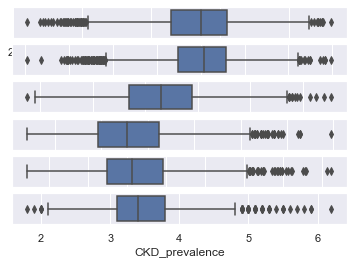

In [21]:
fig, axs = plt.subplots(nrows=6)
sns.boxplot('anycondition_prevalence', data=health, ax=axs[0])
sns.boxplot('Obesity_prevalence', data=health, ax=axs[1])
sns.boxplot('Heart disease_prevalence', data=health, ax=axs[2])
sns.boxplot('COPD_prevalence', data=health, ax=axs[3])
sns.boxplot('diabetes_prevalence', data=health, ax=axs[4])
sns.boxplot('CKD_prevalence', data=health, ax=axs[5])
plt.tight_layout()

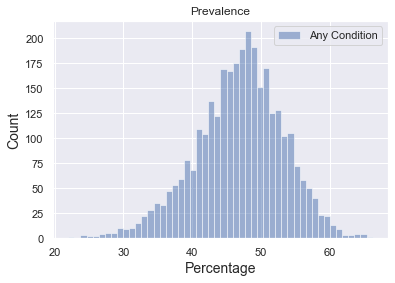

In [28]:
plt.figure
plt.hist(health['anycondition_prevalence'], bins=50, alpha=0.5, label="Any Condition")
plt.xlabel("Percentage", size=14)
plt.ylabel("Count", size=14)
plt.title("Prevalence")
plt.legend(loc='upper right')

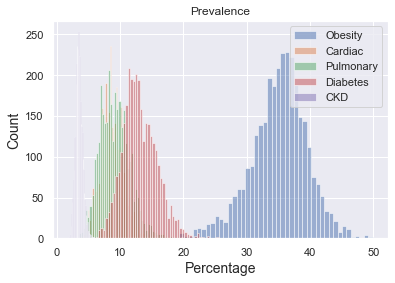

In [30]:
plt.figure
plt.hist(health['Obesity_prevalence'], bins=50, alpha=0.5, label="Obesity")
plt.hist(health['Heart disease_prevalence'], bins=50, alpha=0.5, label="Cardiac")
plt.hist(health['COPD_prevalence'], bins=50, alpha=0.5, label="Pulmonary")
plt.hist(health['diabetes_prevalence'], bins=50, alpha=0.5, label="Diabetes")
plt.hist(health['CKD_prevalence'], bins=50, alpha=0.5, label="CKD")

plt.xlabel("Percentage", size=14)
plt.ylabel("Count", size=14)
plt.title("Prevalence")
plt.legend(loc='upper right')

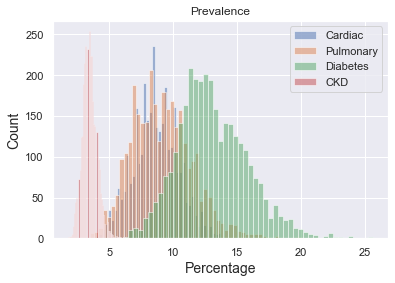

In [37]:
plt.figure
plt.hist(health['Heart disease_prevalence'], bins=50, alpha=0.5, label="Cardiac")
plt.hist(health['COPD_prevalence'], bins=50, alpha=0.5, label="Pulmonary")
plt.hist(health['diabetes_prevalence'], bins=50, alpha=0.5, label="Diabetes")
plt.hist(health['CKD_prevalence'], bins=50, alpha=0.5, label="CKD")

plt.xlabel("Percentage", size=14)
plt.ylabel("Count", size=14)
plt.title("Prevalence")
plt.legend(loc='upper right')